## Option pricing

Option pricing estimates the value of an option contract by estimating a price, known as a premium, based on stochastic model.

---

### Black-Scholes model

Given a stock $S(t)$ is modelled under the risk-neutral Geometric Brownian Motion (GBM) model, the Black-Scholes model allows to compute the theoretical value of an option contract for European options based on five input variables:

![](./img/bs-model-overview.png)

for which the dynamics of the stock and option value, under risk-neutral measure $\mathbb{Q}$, are given by

\begin{align}
    dS(t) &= r \cdot S(t) \cdot dt + \sigma \cdot S(t) \cdot dW^{\mathbb{Q}}(t),
    \\
    dV(t, S) &= \left( \frac{\partial V(t,S)} {\partial t} + r \frac{\partial V(t,S)} {\partial S} + \frac{1}{2}  \sigma^2 \frac{\partial^2 V(t,S)} {\partial S^2} \right)dt + \sigma  \frac{\partial V} {\partial S} dW^{\mathbb{Q}} ,
\end{align}

which yields the Black-Scholes pricing PDE

\begin{equation}
    
    \frac{dV(t, S)}{\partial t}  + rS \frac{\partial V(t,S)} {\partial S} + \sigma^2 \frac{\partial^2 V(t,S)} {\partial S^2} - rV(t,S) = 0,

\end{equation}

with a terminal condition $V(T, S) = H(T, S)$ specified by some payoff function $H(T, S)$ at time $T$, based on whether the type of the option contract (CALL or PUT).

The **Feynman-Kac theorem** allows to express the solution to a PDE with a terminal condition (in this case the Black-Scholes pricing PDE) in terms of an expectation

\begin{equation}
    V(t) = e^{-r(T-t)} \cdot \mathbb{E}^{\mathbb{Q}} [H(T,S) | \mathcal{F}(t)],
\end{equation}

where the expectation can be solved using simulation or integration. An analytical solution is then given by

\begin{equation}\begin{split}
    V_{c}(t,S)  & = S(t)F_{\mathcal{N(0,1)}}(d_1) - Ke^{-r(T-t)}F_{\mathcal{N(0,1)}}(d_2),
    \\
    V_{p}(t,S)  & = Ke^{-r(T-t)}F_{\mathcal{N(0,1)}}(-d_2) - S(t)F_{\mathcal{N(0,1)}}(-d_{1}),
\end{split}\end{equation}

with

\begin{equation}
    d_1 = \frac{ \log\frac{S(t)}{K} + (r + \frac{1}{2} \sigma^2)(T-t)}{\sigma \sqrt{T-t}} \quad, \quad d_2 = d_1 - \sigma \sqrt{T-t}.
\end{equation}

In the [`pyfin.black_scholes` module](../pyfin/black_scholes.py), two methods are implemented for option pricing: analytical and numerical, respectively `bs()` and `bs_num`(), both of which take the similar inputs and return an estimated option price.

The analytical method utilizes the analytical Feynman-Kac solution given by $(5)$. The numerical method computes $n$ number of stock prices at expiration, given by

\begin{equation}
	S(t) = S_0 \cdot \exp{((r - 1/2 \cdot \sigma^2) \cdot (t - t_0) + \sigma \cdot (W^{\mathbb{Q}}(t) - W^{\mathbb{Q}}(t_0)))}
\end{equation}

thus not needing simulate the timesteps inbetween expiration. The option price is then estimated as given by $(4)$ using the discounted mean of the payoff of the simulated stock prices.

The two methods are compared accross different strike prices, where the numerical method is furhter compared accross the number of paths $n$ used in simulation of the GBM.

In [16]:
%run ./config/setup.py
from pyfin.black_scholes import bs, bs_num

# parameters

s0 = 100
r = 0.05
sigma = 0.1
T = 1
K = range(80, 110, 1)

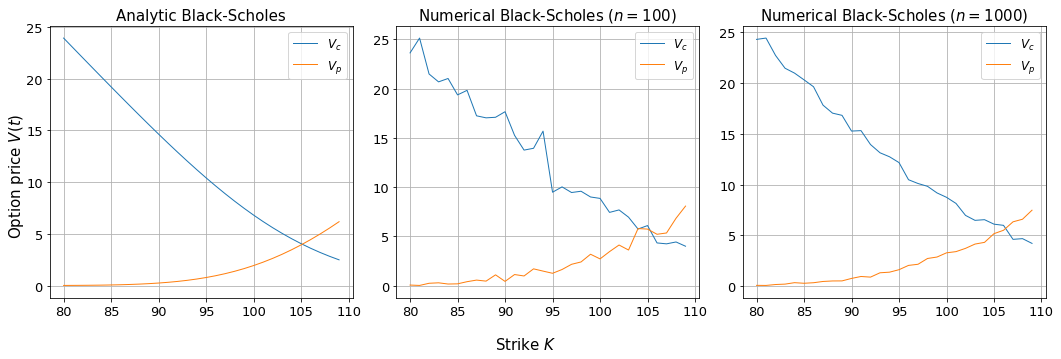

In [17]:
# plot

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

Vc = [bs(option_type="CALL", s0=s0, K=k, r=r, sigma=sigma, T=T) for k in K]
Vp = [bs(option_type="PUT", s0=s0, K=k, r=r, sigma=sigma, T=T) for k in K]
axs[0].plot(K, Vc, label=r"$V_c$")
axs[0].plot(K, Vp, label=r"$V_p$")
axs[0].set_title("Analytic Black-Scholes")

Vc = [bs_num(option_type="CALL", s0=s0, K=k, r=r, sigma=sigma, T=T, num_paths=100) for k in K]
Vp = [bs_num(option_type="PUT", s0=s0, K=k, r=r, sigma=sigma, T=T, num_paths=100) for k in K]
axs[1].plot(K, Vc, label=r"$V_c$")
axs[1].plot(K, Vp, label=r"$V_p$")
axs[1].set_title(r"Numerical Black-Scholes ($n=100$)")

Vc = [bs_num(option_type="CALL", s0=s0, K=k, r=r, sigma=sigma, T=T, num_paths=1000) for k in K]
Vp = [bs_num(option_type="PUT", s0=s0, K=k, r=r, sigma=sigma, T=T, num_paths=1000) for k in K]
axs[2].plot(K, Vc, label=r"$V_c$")
axs[2].plot(K, Vp, label=r"$V_p$")
axs[2].set_title(r"Numerical Black-Scholes ($n=1000$)")

for ax in axs.flat:
	ax.legend()
	ax.grid()
fig.supylabel(r"Option price $V(t)$"); fig.supxlabel(r"Strike $K$");